## $\chi^2$ test to check Gaussianity of the PDF data vector

In [1]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

plt.style.use(os.path.join(os.path.abspath('../'), 'plot_style.mplstyle'))
plt.rcParams['text.usetex'] = False

%load_ext autoreload
%autoreload 2

In [17]:
def rebin_pdf(x, y, n=2):
    x = np.mean(x.reshape((-1, n)), axis=1)
    y = np.mean(y.reshape((y.shape[0], -1, n)), axis=-1)
    return x, y

In [18]:
# Read small boxes measurements
r = 15

data_dir = Path('/pscratch/sd/m/mpinon/density/cov/')
data_fn = Path(data_dir) / 'pdf_r{:d}_cov_lhc.npy'.format(r)

lhc_cov_pdf = np.load(data_fn, allow_pickle=True,).item()

lhc_cov_pdf['delta'], lhc_cov_pdf['lhc_y'] = rebin_pdf(lhc_cov_pdf['delta'], lhc_cov_pdf['lhc_y'], n=4)

delta = lhc_cov_pdf['delta']
mask = {'10': (delta >= -1) & (delta <= 4), '15': (delta >= -0.94) & (delta <= 2), '20': (delta >= -0.76) & (z <= 1.4)}
delta = delta[mask[str(r)]]
data = lhc_cov_pdf['lhc_y'][:, mask[str(r)]]

cov_pdf = np.cov(data, rowvar=False)
mean_pdf = np.mean(data, axis=0)
std_pdf = np.diag(cov_pdf)**0.5

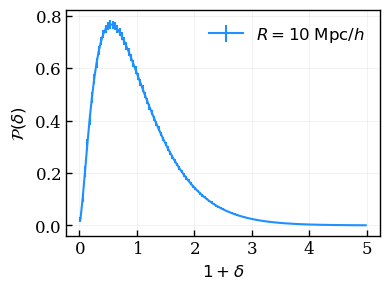

In [27]:
plt.figure(figsize=(4, 3))
plt.errorbar(1+delta, mean_pdf, std_pdf, label=r'$R = {} \; \mathrm{{Mpc}}/h$'.format(r))
plt.xlabel(r'$1 + \delta$')
plt.ylabel(r'$\mathcal{P}(\delta)$')
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(-10, 1)
#plt.ylim(0, 6)
plt.legend()
plt.show()

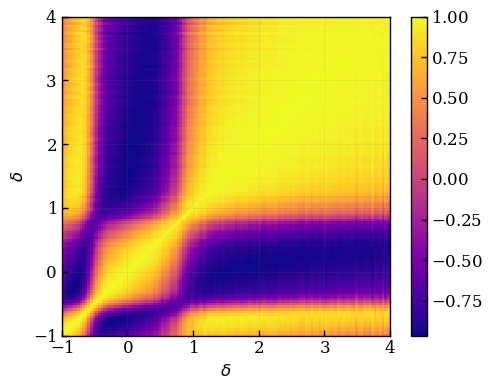

In [5]:
correlation_matrix = np.corrcoef(np.array(cov_pdf))
#print(correlation_matrix)

plt.figure(figsize=(5, 4))
plt.pcolor(delta, delta, correlation_matrix)
plt.xlabel(r'$\delta$')
plt.ylabel(r'$\delta$')
plt.colorbar()
plt.show()

In [6]:
np.linalg.matrix_rank(cov_pdf)

125

In [7]:
len(delta)

125

In [8]:
delta = data - mean_pdf
precmatrix = np.linalg.inv(cov_pdf)
var = np.diag(delta.dot(precmatrix.dot(delta.T)))

In [9]:
from numpy.random import multivariate_normal as mvn
gauss = mvn(mean=mean_pdf, cov=cov_pdf, size=10000)
delta_gauss = gauss - mean_pdf
gauss_var = np.diag(delta_gauss.dot(precmatrix.dot(delta_gauss.T)))

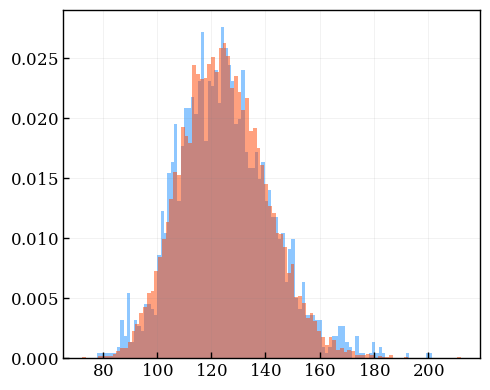

In [10]:
plt.figure(figsize=(5, 4))
plt.hist(var, bins=100, alpha=0.5, density=True)
plt.hist(gauss_var, bins=100, alpha=0.5, density=True)
plt.show()